# Lawrence OLADEJI's University of Ibadan MSc Project (IBEDC_OGUN): Median
Presentation of LSTM

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%timeit
%matplotlib inline
sns.set()

In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

import os
import warnings  
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor

In [5]:
data=pd.read_csv("C:/Users/USER/Desktop/Lawrence/UI Msc/Project folder/ibedcogun/datafeatures.csv", parse_dates= {"date" : ["year","month","dow"]})

In [6]:
data.head()

,date,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,WS10M,WS2M,SP,PowerSuMW
0,2015-11-01,24.05,23.81,23.93,18.49,98.38,0.21,1.40,0.59,100.12,68.1
1,2015-11-01,23.98,23.74,23.87,18.43,98.38,0.22,1.37,0.58,100.06,65.2
2,2015-11-01,23.90,23.65,23.77,18.37,98.25,0.22,1.36,0.57,100.02,60.1
3,2015-11-01,23.76,23.52,23.64,18.19,98.38,0.21,1.38,0.58,100.00,58.2
4,2015-11-01,23.65,23.41,23.53,18.13,98.50,0.20,1.41,0.61,100.02,56.7


In [7]:
data = data.set_index(pd.DatetimeIndex(data['date']))

In [8]:
#Check whether there is any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48936 entries, 2015-11-01 to 2021-05-02
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         48936 non-null  datetime64[ns]
 1   T2M          48936 non-null  float64       
 2   T2MDEW       48936 non-null  float64       
 3   T2MWET       48936 non-null  float64       
 4   QV2M         48936 non-null  float64       
 5   RH2M         48936 non-null  float64       
 6   PRECTOTCORR  48936 non-null  float64       
 7   WS10M        48936 non-null  float64       
 8   WS2M         48936 non-null  float64       
 9   SP           48936 non-null  float64       
 10  PowerSuMW    48934 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 4.5 MB


In [9]:
#Lets find out how many unique values are present in each column

for value in data:
    print('For {},{} unique values present'.format(value,data[value].nunique()))

For date,469 unique values present
For T2M,1665 unique values present
For T2MDEW,1445 unique values present
For T2MWET,1398 unique values present
For QV2M,245 unique values present
For RH2M,1007 unique values present
For PRECTOTCORR,445 unique values present
For WS10M,514 unique values present
For WS2M,338 unique values present
For SP,151 unique values present
For PowerSuMW,2756 unique values present


In [10]:
data.head()

,date,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,WS10M,WS2M,SP,PowerSuMW
date,,,,,,,,,,,
2015-11-01,2015-11-01,24.05,23.81,23.93,18.49,98.38,0.21,1.40,0.59,100.12,68.1
2015-11-01,2015-11-01,23.98,23.74,23.87,18.43,98.38,0.22,1.37,0.58,100.06,65.2
2015-11-01,2015-11-01,23.90,23.65,23.77,18.37,98.25,0.22,1.36,0.57,100.02,60.1
2015-11-01,2015-11-01,23.76,23.52,23.64,18.19,98.38,0.21,1.38,0.58,100.00,58.2
2015-11-01,2015-11-01,23.65,23.41,23.53,18.13,98.50,0.20,1.41,0.61,100.02,56.7


In [11]:
data=data.drop('date',axis=1)

In [12]:
data.head()

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,WS10M,WS2M,SP,PowerSuMW
date,,,,,,,,,,
2015-11-01,24.05,23.81,23.93,18.49,98.38,0.21,1.40,0.59,100.12,68.1
2015-11-01,23.98,23.74,23.87,18.43,98.38,0.22,1.37,0.58,100.06,65.2
2015-11-01,23.90,23.65,23.77,18.37,98.25,0.22,1.36,0.57,100.02,60.1
2015-11-01,23.76,23.52,23.64,18.19,98.38,0.21,1.38,0.58,100.00,58.2
2015-11-01,23.65,23.41,23.53,18.13,98.50,0.20,1.41,0.61,100.02,56.7


In [13]:
data.shape

(48936, 10)

In [14]:
datainter=data.interpolate()

In [12]:
#datamedian=data.mask(data==0).fillna(data.median())

In [15]:
datainter.describe()

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,WS10M,WS2M,SP,PowerSuMW
count,48936.000000,48936.000000,48936.000000,48936.000000,48936.000000,48936.000000,48936.000000,48936.000000,48936.000000,48936.000000
mean,25.760204,23.266925,24.513579,18.061904,87.158187,0.197009,1.939812,1.124765,100.072701,86.211511
std,2.687356,2.131188,1.993872,2.046118,12.607574,0.439348,0.736856,0.541947,0.806128,46.735983
min,13.220000,8.940000,11.800000,7.140000,28.250000,0.000000,0.020000,0.010000,12.100000,0.000000
25%,23.890000,22.900000,23.510000,17.520000,78.690000,0.010000,1.520000,0.730000,99.940000,61.600000
50%,25.330000,23.780000,24.680000,18.490000,92.440000,0.060000,1.810000,0.960000,100.070000,95.200000
75%,27.800000,24.500000,25.890000,19.350000,97.440000,0.210000,2.290000,1.420000,100.210000,117.200000
max,34.100000,26.760000,28.790000,22.220000,100.000000,14.550000,5.820000,3.740000,153.800000,226.500000


In [19]:
# X(Independent variables) and y(target variables) 
X = datamedian.iloc[:,0:8].values
y = datamedian.iloc[:,9].values

In [21]:
datainter.interpolate()

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,WS10M,WS2M,SP,PowerSuMW
date,,,,,,,,,,
2015-11-01,24.05,23.81,23.93,18.49,98.38,0.21,1.40,0.59,100.12,68.1
2015-11-01,23.98,23.74,23.87,18.43,98.38,0.22,1.37,0.58,100.06,65.2
2015-11-01,23.90,23.65,23.77,18.37,98.25,0.22,1.36,0.57,100.02,60.1
2015-11-01,23.76,23.52,23.64,18.19,98.38,0.21,1.38,0.58,100.00,58.2
2015-11-01,23.65,23.41,23.53,18.13,98.50,0.20,1.41,0.61,100.02,56.7
...,...,...,...,...,...,...,...,...,...,...
2021-05-02,25.51,24.87,25.19,19.78,96.12,0.52,1.88,0.94,99.98,135.2
2021-05-02,25.18,24.69,24.94,19.59,97.00,0.56,1.80,0.88,100.00,127.4
2021-05-02,24.83,24.50,24.66,19.35,97.94,0.60,1.58,0.74,100.04,93.2


In [23]:
# X(Independent variables) and y(target variables) 
X = datainter.iloc[:,0:8].values
y = datainter.iloc[:,9].values

In [24]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# example of power transform input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor

In [26]:
from sklearn.preprocessing import StandardScaler
#scaling
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [27]:
# prepare the model with input scaling
pipeline = Pipeline(steps=[('power', PowerTransformer()), ('model', HuberRegressor())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 35.933


# Multiple  Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [30]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [31]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [32]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]})
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  3.0
Decision tree  Regression Model Score is  -73.0
Random Forest Regression Model Score is  7.0


,Model,Score,Explained Variance Score
2,Random forest Regression,0.069234,-4.056653
0,Multiple Linear Regression,0.028267,-36.127569
1,Decision Tree,-0.728505,-0.655903


# Linear Regression

In [33]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'
#scoring = 'accuracy

# Multiple Linear Regression.

In [34]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))

In [35]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -2103.215434 (17.068580)


# LASSO Regression

In [36]:
# Spot-Check Algorithms
models = []
models.append(('LASSO', Lasso()))

In [37]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LASSO: -2115.024972 (17.539647)


# Elastic Net linear Regression

In [38]:
# Spot-Check Algorithms
models = []
models.append(('EN', ElasticNet()))

In [39]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

EN: -2118.053378 (17.112783)



# Non Linear Regression#

# KNeighbors Regressor

In [40]:
# Spot-Check Algorithms
models = []
models.append(('KNN', KNeighborsRegressor()))

In [41]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: -2241.640641 (19.706047)


# Decision Tree Regressor

In [42]:
# Spot-Check Algorithms
models = []
models.append(('DECTR', DecisionTreeRegressor()))

In [43]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

DECTR: -3930.818844 (88.502926)


# Support Vector Regressor

In [44]:
# Spot-Check Algorithms
models = []
models.append(('SVR', SVR()))

In [47]:
%timeit
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVR: -2130.479047 (26.348568)


# Random Forest Regressor

In [48]:
# Spot-Check Algorithms
from sklearn.ensemble import RandomForestRegressor
models = []
models.append(('RF', RandomForestRegressor()))

In [49]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: -1991.794254 (25.579186)


# Consolidating all Regressor

In [50]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DECTR', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVR', SVR()))

In [51]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -2103.215434 (17.068580)
LASSO: -2115.024972 (17.539647)
EN: -2118.053378 (17.112783)
KNN: -2241.640641 (19.706047)
DECTR: -3931.919100 (101.498712)
RF: -1995.414258 (31.539333)


KeyboardInterrupt: 

# Comparison of Linear and Non Linear Machine learning Algorithm Performance

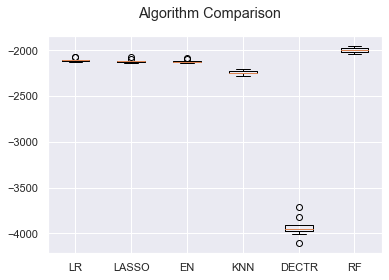

In [52]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [53]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [54]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaDECTR', Pipeline([('Scaler', StandardScaler()),('DECT',DecisionTreeRegressor())])))
pipelines.append(('ScaRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
pipelines.append(('ScaSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))


In [55]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaLR: -2103.215434 (17.068580)
ScaLASSO: -2115.014025 (17.516866)
ScaEN: -2118.042421 (17.084052)
ScaKNN: -2239.930421 (19.221333)
ScaDECTR: -3955.930699 (82.849153)
ScaRF: -1993.725277 (29.340552)
ScaSVR: -2130.427565 (26.316091)


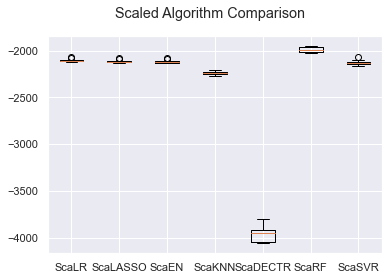

In [56]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# KNN  Algorithm Tuning

In [57]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [58]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -2029.463749 using {'n_neighbors': 21}
-3653.620431 (61.759085) with: {'n_neighbors': 1}
-2465.168174 (43.909982) with: {'n_neighbors': 3}
-2241.640641 (19.706047) with: {'n_neighbors': 5}
-2162.775595 (18.657598) with: {'n_neighbors': 7}
-2115.833390 (26.710085) with: {'n_neighbors': 9}
-2086.895110 (32.119693) with: {'n_neighbors': 11}
-2067.499878 (27.736674) with: {'n_neighbors': 13}
-2055.097071 (27.197185) with: {'n_neighbors': 15}
-2042.161553 (24.705863) with: {'n_neighbors': 17}
-2035.702184 (23.476473) with: {'n_neighbors': 19}
-2029.463749 (20.146259) with: {'n_neighbors': 21}


# Essemble Algorithms: AdaBoost, Gradient Boosting, RF and Extra Tree Regressor

In [59]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AdaB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

In [60]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_resultscv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -2130.427565 (26.316091)
ScaledGBM: -2130.427565 (26.316091)
ScaledRF: -2130.427565 (26.316091)
ScaledET: -2130.427565 (26.316091)


# Compare result for Esembles Algorithms

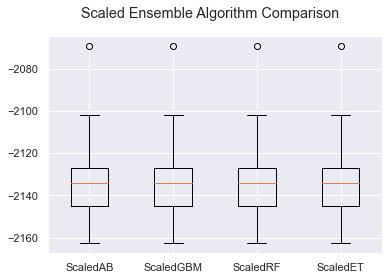

In [61]:
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# End of ML (Linear Reg, Non-Linear Reg & Essembles) Algorithm Comparison Performance.

In [62]:
data=pd.read_csv("C:/Users/USER/Desktop/Lawrence/UI Msc/Project folder/ibedcogun/datafeatures.csv", parse_dates= {"date" : ["year","month","dow"]})

In [63]:
data.head()

,date,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,WS10M,WS2M,SP,PowerSuMW
0,2015-11-01,24.05,23.81,23.93,18.49,98.38,0.21,1.40,0.59,100.12,68.1
1,2015-11-01,23.98,23.74,23.87,18.43,98.38,0.22,1.37,0.58,100.06,65.2
2,2015-11-01,23.90,23.65,23.77,18.37,98.25,0.22,1.36,0.57,100.02,60.1
3,2015-11-01,23.76,23.52,23.64,18.19,98.38,0.21,1.38,0.58,100.00,58.2
4,2015-11-01,23.65,23.41,23.53,18.13,98.50,0.20,1.41,0.61,100.02,56.7


In [64]:
data=pd.read_csv("C:/Users/USER/Desktop/Lawrence/UI Msc/Project folder/ibedcogun/datafeatures.csv", parse_dates= {"date" : ["year","month","dow"]})

In [65]:
data.head()

,date,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,WS10M,WS2M,SP,PowerSuMW
0,2015-11-01,24.05,23.81,23.93,18.49,98.38,0.21,1.40,0.59,100.12,68.1
1,2015-11-01,23.98,23.74,23.87,18.43,98.38,0.22,1.37,0.58,100.06,65.2
2,2015-11-01,23.90,23.65,23.77,18.37,98.25,0.22,1.36,0.57,100.02,60.1
3,2015-11-01,23.76,23.52,23.64,18.19,98.38,0.21,1.38,0.58,100.00,58.2
4,2015-11-01,23.65,23.41,23.53,18.13,98.50,0.20,1.41,0.61,100.02,56.7


In [231]:
X = datainter[['SP','WS10M','RH2M','WS2M']]
y= datainter['PowerSuMW']

In [232]:
from sklearn.linear_model import LinearRegression

In [233]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [234]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [235]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [236]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))

Multiple Linear Regression Model Score is  1.0
Decision tree  Regression Model Score is  -87.0


In [158]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

KeyboardInterrupt: 

In [72]:
SVC_regressor = SVR(kernel='rbf')
SVC_regressor.fit(X_train,y_train)
SVC_regressor.score(X_test,y_test)
SVC_pred =SVC_regressor.predict(X_test)
SVC_score=SVC_regressor.score(X_test,y_test)
expl_SVC = explained_variance_score(SVC_pred,y_test)

NameError: name 'SVC_pred' is not defined

In [237]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))
print("Support Vector Regression Model Score is ",round(SVC_regressor.score(X_test,y_test)*100))


#Let's have a tabular pandas data frame, for a clear comparison
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression', "Support vector"],
                            'Score':[mlr_score,decision_score,rf_score,SVC_regressor.score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf,expl_SCV]})
models_score.sort_values(by='accuracy',ascending=False)

Multiple Linear Regression Model Score is  1.0
Decision tree  Regression Model Score is  -87.0


ValueError: X has 4 features, but RandomForestRegressor is expecting 3 features as input.

In [240]:
val_pred2 = mlr.predict(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[111.    0.  119.2 ... 113.2 148.4   0. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
rmse = np.sqrt(mean_squared_error(X_test, val_pred2))
print("Test(Validation) RMSE ="  ,rmse)